In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/shivani.mathur01/Desktop/Work/python/files/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.drop("User ID",axis=1,inplace=True)

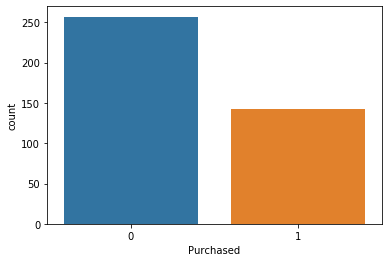

In [4]:
sns.countplot(data['Purchased'])

In [5]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

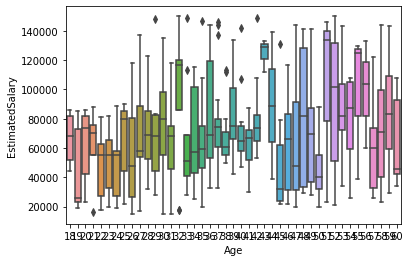

In [6]:
sns.boxplot(x="Age",y="EstimatedSalary",data=data)

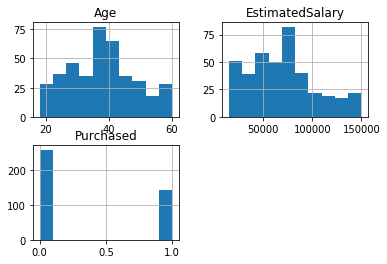

In [7]:
hist=data.hist()

In [8]:
gender=pd.get_dummies(data['Gender'],drop_first=True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [9]:
data.drop('Gender',axis=1,inplace=True)

In [10]:
data=pd.concat([data,gender],axis=1)
data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [46]:
x = data.drop('Purchased', axis = 1)
y = data['Purchased']

In [47]:
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler(feature_range=(0,1))
X=scalar.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X.head()

,Age,EstimatedSalary,Male
0,0.023810,0.029630,1.0
1,0.404762,0.037037,1.0
2,0.190476,0.207407,0.0
3,0.214286,0.311111,0.0
4,0.023810,0.451852,1.0


In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred=reg.predict(X_test)

In [57]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [53]:
confusion_matrix(y_test,y_pred)

array([[76,  3],
       [17, 24]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [55]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.96      0.88        79\n           1       0.89      0.59      0.71        41\n\n    accuracy                           0.83       120\n   macro avg       0.85      0.77      0.79       120\nweighted avg       0.84      0.83      0.82       120\n'

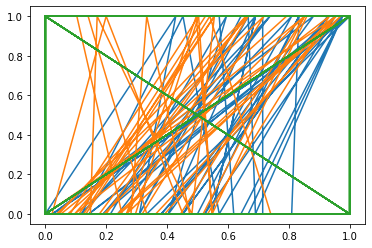

In [58]:
plt.plot(X_test,y_pred)